In [77]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp

In [50]:
# Load data
drive.mount("/content/gdrive")  
!pwd 
%cd "/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina"
!ls 
df = pd.read_csv('data.csv') 
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina
/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina
data.csv  sklearn_LinearRegression.ipynb


,height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


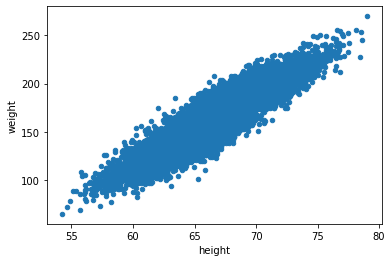

In [51]:
# Visualice data
df.plot(kind='scatter', x='height', y='weight')
plt.show()

In [52]:
# Assign x and y values
df_x=pd.DataFrame(df.height)
df_y=pd.DataFrame(df.weight)

In [53]:
# x values description
df_x.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [54]:
# Test train split for supervised training
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

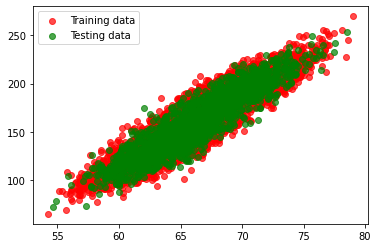

In [55]:
# Test train split visualization
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
plt.legend()
plt.show()

In [56]:
# Create linear model and train it
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
reg.coef_

array([[7.72250589]])

In [58]:
# Use model to predict on test data
prediction=reg.predict(x_test)

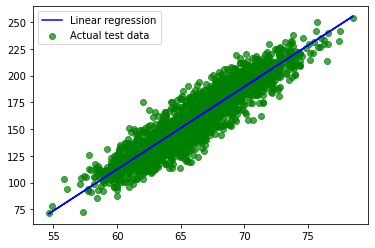

In [59]:
# Plot prediction line against actual test data
plt.plot(x_test, prediction, label='Linear regression', color='b')
plt.scatter(x_test, y_test, label='Actual test data', color='g', alpha=.7)
plt.legend()
plt.show()

In [60]:
# Test predictions 
prediction[1]

array([158.59755791])

In [61]:
y_test

,weight
1603,181.325329
8713,155.414139
4561,168.695155
6600,135.780229
2558,198.045548
...,...
1944,171.350324
5978,137.284027
9809,104.872612
4014,204.779499


In [76]:
# Model Information
print("Intercept:", reg.intercept_)
print("Coeficiente:", list(zip(x_test.columns, reg.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", reg.score(x_test, y_test))

Intercept: [-351.02587529]
Coeficiente: [('height', 7.7225058871406205)]
Coeficiente de determinación R^2: 0.8513618855525324


In [78]:
# Model test error
predicciones = reg.predict(X = x_test)
rmse = mean_squared_error(y_true  = y_test,y_pred  = predicciones,squared = False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 12.372434423109533


In [62]:
# Score the model
reg.score(x_test, y_test)

0.8513618855525324

In [63]:
reg.score(x_train, y_train)

0.8561208934839917

In [64]:
scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='r2')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.86 with a standard deviation of 0.01


In [65]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, x_train, y_train, x_test, y_test, loss='mse', num_rounds=50, random_seed=20)
 
# summary of the results
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

ValueError: ignored

In [67]:
# Lasso model regularization
lasso_reg = Lasso(alpha=0.3)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.3)

In [68]:
lasso_reg.score(x_test, y_test)

0.8513712187225047

In [69]:
lasso_reg.score(x_train, y_train)

0.8561149964826482

In [70]:
# Ridge model regularization
ridge_reg = Ridge(alpha=0.3)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.3)

In [71]:
ridge_reg.score(x_test, y_test)

0.8513619002560128

In [72]:
ridge_reg.score(x_train, y_train)

0.8561208934784967

In [73]:
# Lasso and ridge predictions
prediction_lasso=lasso_reg.predict(x_test)
prediction_ridge=ridge_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


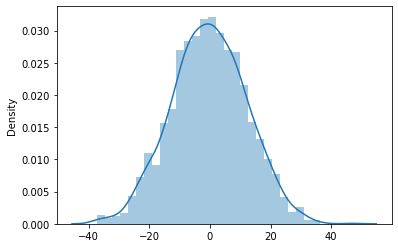

In [74]:
prediction_lasso=prediction_lasso.reshape(2000,1)
sns.distplot(y_test-prediction_lasso)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


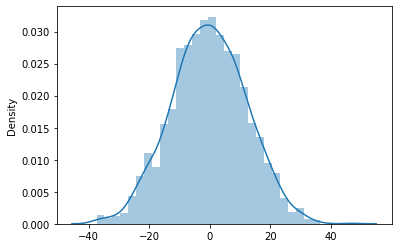

In [75]:
sns.distplot(y_test-prediction_ridge)